<a href="https://colab.research.google.com/github/nspeer12/AI_CAP4630/blob/master/hw5/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

# Introduction

We've all heard about "AI" in books, movies and media, and because of this, my perception of what artificial intelligence was skewed when I came into the class. This course cleared many of the common misconceptions I held. Also, many complex topics that seem unapproachable, now feel intuitive. 

#General concepts 

for instance, what is artificial intelligence, machine learning, deep learning

## What is Artificial Intelligence?
Artificial intelligence is science and engineering of building intelligent machines. This begs the question, what is intelligence? Intelligence is the ability to use information to make decisions in an effort to achieve a goal. Intelligence can be found not only in humans, but many other species. Intelligence is not only limited to mathmatical problem solving, but can also be expressed in music, language, physical activity, and many other areas. 

For example, an artificially intelligent computer program could process an image of a game board, analyze the scenario, decide on its next move, in an effort to win the game. Artificial intelligence is not limited to games and self driving cars. AI can be used to find solutions and approximate many problems, such as weather forecasts, speech recognition and generation, and even medical diagnosis. AI is a facinating science that has been contemplated since the days of early computing. Our ability to make intelligent machines is improving, and surely we will see exciting applications of this advanced technology.

## What is Machine Learning

Machine learning is the science of computer programs that are designed to improve. Machine learning programs are able to make adjustments to themselves based on their performance. The two primary subsets of machine learning are supervised learning and unsupervised learning. 

### Supervised Learning

Supervised learning is a type of machine learning in which the inputs and desired outputs are explicitly stated. A supervised machine learning program is designed to continually learn from a training set of data, and measure its performance on unseen testing data. Each time the program sees the training set, it will make incremental improvements to itself. This method is the fundamental approach to problems such as linear regression.

### Unsupervised Learning

Unsupervised learning is when a program is not given explicit training inputs and labels, but rather learns by testing against some outcome. This can be viewed as pattern recognition. Common problems for unsupervised learning include classification

### Reinforcement Learning

Reinforcement learning operates differently than the previously mentioned machine learning methods. In reinforcement learning, there is an *agent* and an *environemnt*. The agent interacts with the environment in order to earn rewards and avoid punishment. I like to think of this as operant conditioning for your computer. This method can be applied to video games, as they offer an ideal environment to train an agent. A famous example or reinforcement learning would be AlphaGo, which demonstrated the power of current machine learning technology by defeating Lee Sedol, who is considered to be the best human player at the game. 



## Deep Learning

Deep learning is an area of machine learning in which data structures called artificial neural networks (ANN) are utilized. In deep learning, ANNs are often fully connected, directed, weighted graphs. ANNs recieve some data through the input layer, then possibly pass transformed data to the hidden layers, and finally output some values in the output layer.


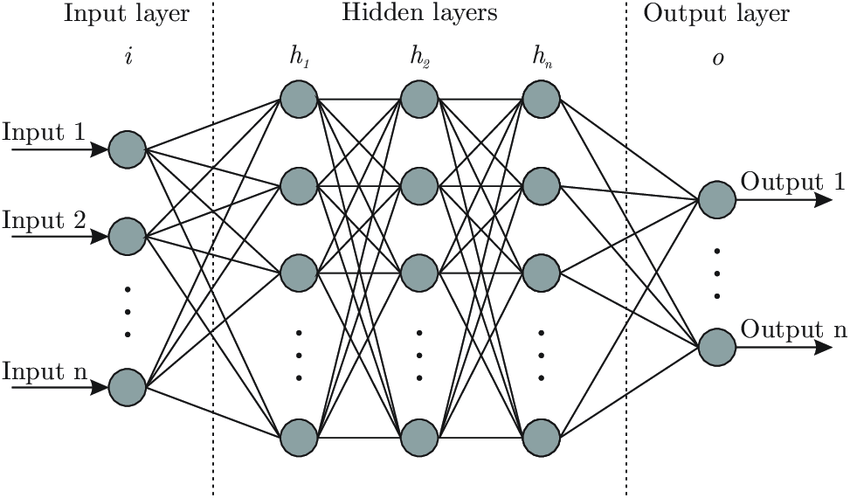

#Basic concepts

What I really value throughout this course is how I gained a great understanding of the concepts that are fundamental to machine learning. Prior to this course, I often found myself trying to learn something that was too far outside of my current understanding. After learning these key concepts, I feel as if I have a solid understanding of the most important concepts that are key to building more complex and interesting machine learning programs.

## Linear Regression

What is so beautiful about linear regression, is that it is simply just $ y = mx + b $ . In linear regression, the objective of the machine learning program is to approximate the equation of a line, based on the input data and label values specified. A linear regression model is able to make incremental adjustments to the weights based on the gradient of the loss function.

Linear regression can also be multidimensional, and the model is represented by the equation

$ \hat y = b + w_1 x_1 + w_2 x_2 + ... + w_n x_n $

In [0]:
# Get some data 
m = 100
x = 2 * np.random.rand(m, 1)
y = 4 + 3 * x + np.random.rand(m, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

### Creating a Linear Regression Model in Keras

In [3]:
model = keras.Sequential()

# for a simple 2d linear regression, the input is of size 1 and the output is of size 1
model.add(keras.layers.Dense(1, input_shape=(1,), activation='linear'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
3/3 [==============================] - 0s 2ms/step - loss: 62.4518 - mse: 61.7701
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 47.5863 - mse: 47.7989
Epoch 3/50
3/3 [==============================] - 0s 1ms/step - loss: 37.7481 - mse: 37.1184
Epoch 4/50
3/3 [==============================] - 0s 2ms/step - loss: 27.9156 - mse: 28.7689
Epoch 5/50
3/3 [==============================] - 0s 2ms/step - loss: 22.5425 - mse: 22.5266
Epoch 6/50
3/3 [==============================] - 0s 1ms/step - loss: 17.2752 - mse: 17.5355
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 13.2569 - mse: 13.7261
Epoch 8/50
3/3 [==============================] - 0s 2ms/step - loss: 10.5044 - mse: 10.7958
Epoch 9/50
3/3 [==============================] - 0s 1ms/step - loss: 8.4105 - mse: 8.4710
Epoch 10/50
3/3 [==============================] - 0s 1ms/step - loss: 6.5424 - mse: 6.6357
Epoch 11/50
3/3 [==============================] - 0s 1ms/step - loss: 5.

### Drawing Prediction Line

It is possible to extract the weights from our model and plot out the line of prediction for the linear regression. Simply, our model contains 2 weights, first being $w$ and secondly $b$. These weights take the form of 

$\hat y = wx + b$

In [4]:
weights = model.get_weights()
print(weights)

[array([[3.4425929]], dtype=float32), array([4.074629], dtype=float32)]


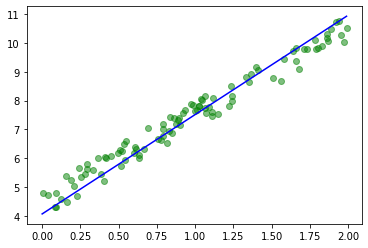

In [5]:
fig, ax = plt.subplots()

space = np.linspace(0, max(x))

pred_line = space * weights[0] + weights[1]

ax.plot(space, pred_line, color='blue')

ax.scatter(x,y, color='green', alpha=0.5)

plt.show()

## Gradient Descent

Gradient descent is an implementation of calculating slope to minimize loss.  Calculus gives use the ability to determine the slope at any point in a function. Machine learning levereges this fact by taking the slope of a loss function with respect to each of its weights, and adjusts each of its weights in order to further minimize the loss of the model.

Gradient descent is the process of iteratively adjusting the weights of a model in order to minimize the loss function. By taking the gradient with respect to each weight, we are able to adjust each weight in a direction that minimizes the loss, and should improve our model. 

An analogy to this process is hiking down a mountain. The mountian represent our loss, and we need to find our way to the bottom in order to improve the model. We take reasonable steps down the mountian so that we do not fall or move too slowly. We will always move down the mountian in by moving in the steepest downward direction.

Each weight is adjusted by the gradient, multiplied by a learning rate $\alpha$ . The learning rate ensures that our model does not have a divergent loss. 

$ w = w \pm \alpha * \frac{\delta L}{\delta w}$

## Logistic Regression

Logistic regression is a machine learning model designed to make a binary classification. Logistic regression is commonly used for classification problems, such as determining if an image contains a cat or a dog.

The way this is implemented is by applying a sigmoid fucntion to the same formula as linear regression. The sigmoid function truncates the output values to a binary classification between 0 and 1. The closer the output is to 0 or 1, the more confident the model is in its prediction. The output can also be seen as a probability that the input is one class or the other.

$ \hat y = \sigma (b + w_1 x_1 + w_2 x_2 + ... + w_n x_n )$

In [0]:

np.random.seed(999)

def get_random_data(w, b, mu, sigma, m):
    
    # labels 1 and 0 with probability of 1/2
    labels = np.array([0 if np.random.rand(1) < .5 else 1 for x in range(m)])
    
    # creating an alternative list
    alt_c = [(-1)**i for i in labels]
    
    # uniform distribution [0, 1)
    x_1 = np.random.uniform(low=0, high=1, size=m)

    noise = np.multiply(alt_c, np.random.normal(loc=mu, scale=sigma, size=m)) 
    
    x_2 = np.multiply(w, x_1)
    x_2 += b
    x_2 = np.add(x_2, noise)
    
    data = np.array([x_1, x_2]).T
    return data, labels

In [0]:
def graph_random_data(data, lables):
    fig, ax = plt.subplots(figsize=(5,5))
    
    # create colors
    colors = ['red' if labels[x] == 1 else 'blue' for x in range(len(labels))]
    
    ax.scatter(data.T[0], data.T[1], c=colors)
    plt.show()

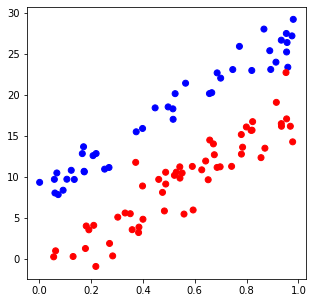

In [8]:

w = 20
b = 3
mu = 5
sigma = 2
m = 100

data, labels = get_random_data(w, b, mu, sigma, m)
graph_random_data(data, labels)

In [0]:
def build_model(input_dim, output_dim, learning_rate=0.1):
    model = keras.Sequential()
    
    # add one layer that outputs with a sigmoid function
    model.add(tf.keras.layers.Dense(output_dim, input_dim=input_dim, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    # specify binary cross entropy loss
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer)

    return model

In [0]:
# 80/20 test train split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)

In [11]:
# input dim should be the number of features, which is 2 in our case
input_dim = 2

# output dimension is 1, which represents our classification
output_dim = 1

model = build_model(input_dim, output_dim)

EPOCHS = 200

history = model.fit(x_train, y_train, epochs=EPOCHS)

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 6.0131
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 3.7297
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 1.4616
Epoch 4/200
3/3 [==============================] - 0s 1ms/step - loss: 1.2261
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 1.7581
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 1.6714
Epoch 7/200
3/3 [==============================] - 0s 2ms/step - loss: 1.3107
Epoch 8/200
3/3 [==============================] - 0s 2ms/step - loss: 0.8164
Epoch 9/200
3/3 [==============================] - 0s 2ms/step - loss: 0.8490
Epoch 10/200
3/3 [==============================] - 0s 2ms/step - loss: 1.0141
Epoch 11/200
3/3 [==============================] - 0s 2ms/step - loss: 0.7361
Epoch 12/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6420
Epoch 13/200
3/3 [==============================] - 0s 2ms/st

Currently our predictions are in the form $ \hat y = \sigma ( w_1 x_1 +w_2 x_2 + b )$

To obtain our dividing line, we are trying to get our weights in the form of

$y = mx + b $

So we can isolate $x_2$ to find the line of division

$x_2 = -(w_1 x_1 + b) / w_2 $

In [0]:
# create an array to represent the space of our data
d = np.linspace(0, 1)

# get weights from model
weights = model.get_weights()

predLine = -((weights[0][0] * d) + weights[1]) / weights[0][1]
trueLine = w * d + b



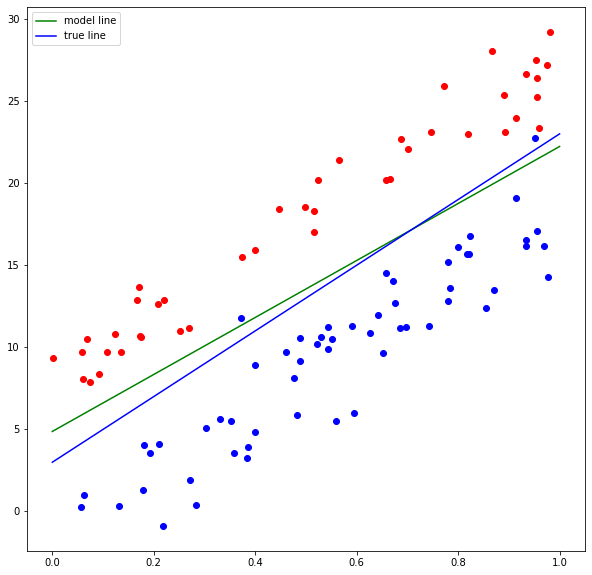

In [13]:
# plot line
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(d, predLine, color='green', label='model line')
ax.plot(d, trueLine, color='blue', label='true line')


for i in range(m):
  # plot real value
  ax.scatter(data.T[0][i], data.T[1][i], c='blue' if labels[i] == 1 else 'red')

ax.legend()
plt.show()

## Convolutions and CNN

Convolutions are an operation that involve two input parameters. Firstly, an input matrix is passed, and secondly a kernel, or filter is defined. In convolutions, the kernel iterates through the columns and rows of the input matrix by a specified stride length. The regions considered are allowed to overlap. If the input, kernel, and stride length do not fit, the input matrix can be padded with zeros so the operation can be performed. The kernel iterates, and considers each subset of the input matrix. The dot product between the subset of the input and the kernel is performed, and then all of the values in this product are summed together. This final value becomes a value of our output matrix.

In [14]:
class invalidInput(Exception):
  print("Error: Input matrix is invalid!")
  exit(1)
  
class invalidKernel(Exception):
  print("Error: Kernel matrix is invalid!")
  exit(1)

Error: Input matrix is invalid!
Error: Kernel matrix is invalid!


In [0]:
def conv2d(input_mat, kernel_mat):
  #input_mat = np.matrix(input_mat)
  #kernel_mat = np.matrix(kernel_mat)
  # check for square inputs
  if kernel_mat.shape[0] != kernel_mat.shape[1]:
    raise invalidKernel()
  elif input_mat.shape[0] != input_mat.shape[1]:
    raise invalidInput()
  else:
    # get the dimensions of the output layer
    n = input_mat.shape[0] - kernel_mat.shape[0] + 1
    m = kernel_mat.shape[0]
  

  output_mat = np.zeros((n, n))

  for i in range(n):
    for k in range(n):
      # multiply by kernel filter
      #print(np.multiply(input_mat[i:i+m, k:k+m], kernel_mat))
      #print()
      conv = np.multiply(input_mat[i:i+m, k:k+m], kernel_mat)
      # sum all elements
      output_mat[i,k] = np.sum(conv)

  return output_mat

In [16]:
input_mat = np.array([[1, 2, 1, 2],
                     [2, 1, 2, 1],
                     [1, 2, 1, 2],
                     [2, 1, 2, 1]])

kernel_mat = np.array([[1, 0],
                      [0, 1]])

print(conv2d(input_mat, kernel_mat))

[[2. 4. 2.]
 [4. 2. 4.]
 [2. 4. 2.]]


# Building a Model

In this next example, I'm going to use the MNIST hand written diget data set to build a fully fledged convolutional neural network

## Loading Data Set

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# grab an image for testing purposes
img = x_train[0]

In [0]:

# array to store all 10 of the 28x28 results
digits = np.zeros((10,28,28))

# frequency of each digit, used for averaging
freq = np.zeros(10)

# loop through training data and add it to its respective result array
for i in range(0, len(y_train)):
    freq[y_train[i]] += 1
    digits[y_train[i]] += (x_train[i])

# average out each matrix
for i in range(0,10):
    digits[i] /= freq[i]

## Visualizing Data Set

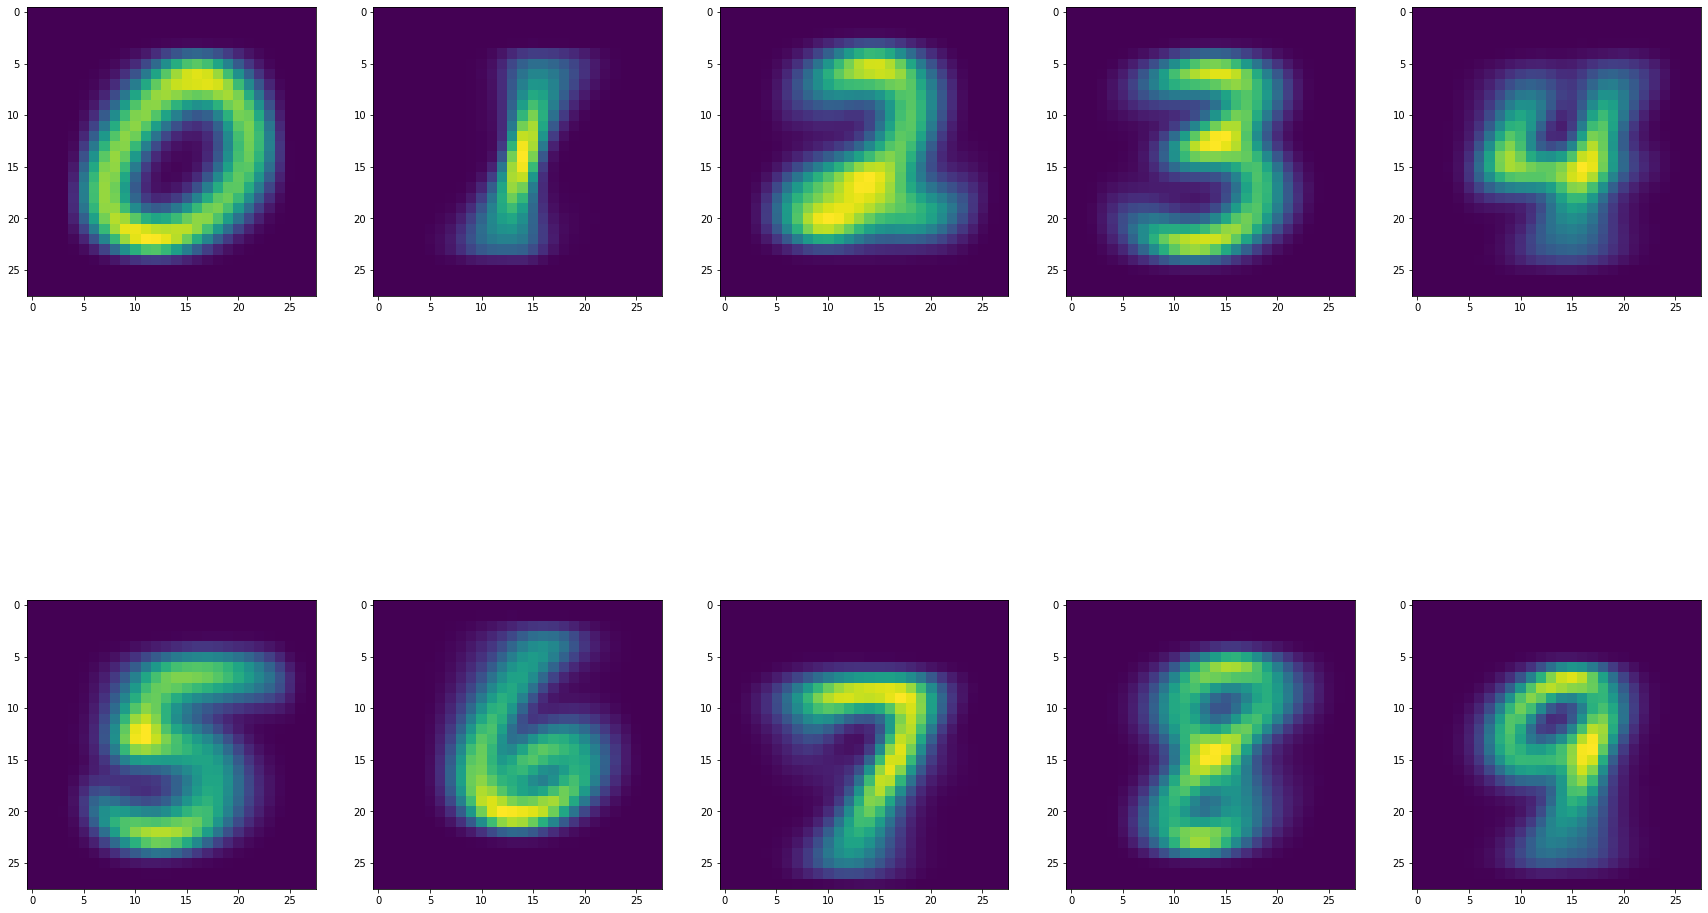

In [19]:
# plot results

fig, axs = plt.subplots(2,5, figsize=(30, 20))
axs = axs.ravel()

for i in range(10):
    axs[i].imshow(digits[i]) 

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()


Using TensorFlow backend.


# Convolutional Layer

The MNIST data set consists of images of 28 by 28 pixels. This layer will take those images and compute convolutions on the input matrix.



In [0]:
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))

# Max Pooling Layer

In [0]:
def maxpooling2d(input_mat, s):

  # handle non-square input matrix
  if input_mat.shape[0] != input_mat.shape[1]:

    # difference of number of columns and rows
    diff = input_mat.shape[0] - input_mat.shape[1]
    
    # more rows than columns
    if diff > 0:
      pad = np.zeros(input_mat.shape[1])
      input_mat = np.column_stack((input_mat, pad))

    # more columns than rows
    elif diff < 0:
      pad = np.zeros(input_mat.shape[1])
      input_mat = np.vstack((input_mat, pad))


  # pad uniformly if stride is uneven
  pad = input_mat.shape[0] % s
  input_mat = np.pad(input_mat, pad)

  # create output matrix
  n = input_mat.shape[0]
  output_dim = (int(n/s), int(n/s))
  output_mat = np.zeros(output_dim)

  # traverse input matrix in increments of s
  for i in range(0, n, s):
    for k in range(0, n, s):
      x = int(i/s)
      y = int(k/s)
      
      # output the maximum value in a subset of input matrix
      output_mat[x][y] = np.max(input_mat[i:i+s, k:k+s])

  return output_mat

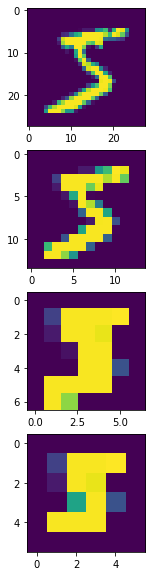

In [47]:
# compute max pooling on the input image
strides = [1, 2, 4, 6]
n = len(strides)

imgs = [maxpooling2d(img, s) for s in strides]

fig, axs = plt.subplots(n, figsize=(10,10))

for i in range(n):
    axs[i].imshow(imgs[i]) 

plt.show()

In [0]:
# add max pooling layer to our model
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Output

In [0]:
# flatten layers from 2d to 1d
model.add(Flatten())

# fully connected layer that takes flattened input
model.add(Dense(64, activation=tf.nn.relu))

## Dropout Layer

Dropout layers help to prevent overfitting by randomly ignoring some number of nodes in our model.

In [0]:
model.add(Dropout(0.2))

## Output

The output layer is a critical component in solving problems using machine learning. Depending on the problem, the output layer needs to be of a shape that represents the desired output. In the case of the MNIST data set, since we are predicting 10 classes of images, our output layer will be a dense layer of length 10.

In [0]:
model.add(Dense(10,activation=tf.nn.sigmoid))

# Activation Functions

# Compiling a model 


# Optimizers

Optimizers are functions that assist in gradient descent. They apply different strategies to updating weights in order to achieve faster and more accurate training results.

# Learning Rate

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Loss

In [0]:
# reshape dataset for training

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#Training a model (for instance, you can talk about overfitting/underfitting)

In [28]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 29s 483us/step - loss: 0.9958 - accuracy: 0.7458
Epoch 2/10
60000/60000 [==============================] - 29s 483us/step - loss: 0.3914 - accuracy: 0.8850
Epoch 3/10
60000/60000 [==============================] - 28s 475us/step - loss: 0.2857 - accuracy: 0.9140
Epoch 4/10
60000/60000 [==============================] - 28s 470us/step - loss: 0.2554 - accuracy: 0.9224
Epoch 5/10
59680/60000 [============================>.] - ETA: 0s - loss: 0.2226 - accuracy: 0.9312

KeyboardInterrupt: ignored

#Finetuning a pretrained model (describe how you proceed)